## Pair Programming - Regresión logística 2

### Procesado - Balanceo

---

In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Gestión datos desbalanceados

from imblearn.combine import SMOTETomek

# Para separar los datos en train y test
from sklearn.model_selection import train_test_split

# Configuración de warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_palette("icefire")

In [3]:
df = pd.read_csv('../archivos/travel_enco_stand_sin_balanceo.csv', index_col=0)
df.head()

,product_name,claim,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,...,agency_SSI,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS
0,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
1,3,0,-29.0,9.57,6,3,5,-1.423021,-0.053718,0,...,0,0,0,0,1,1,0,1,0,0
2,12,0,-49.5,29.70,4,5,8,-1.829379,0.919850,0,...,0,0,0,0,1,0,1,0,0,1
3,12,0,-39.6,23.76,4,5,8,-1.633138,0.632567,0,...,0,0,0,0,1,0,1,0,0,1
4,12,0,-19.8,11.88,5,6,8,-1.240655,0.058003,0,...,0,0,0,0,1,0,1,0,0,1


In [4]:
df.shape

(55284, 32)

### 1. Chequear si los datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.

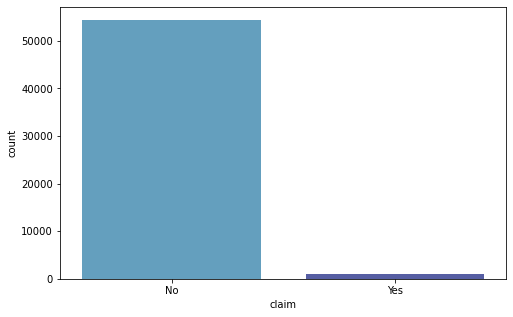

In [5]:
plt.figure(figsize=(8,5))

fig1 = sns.countplot(data = df, x = "claim")
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [6]:
#Porcentajes variable respuesta
df["claim"].value_counts() *100 / df.shape[0]

0    98.334057
1     1.665943
Name: claim, dtype: float64

### 3.1. Utilizamos el método SMOTE para balancear la variable respuesta.

In [7]:
# Separamos la variable respuesta de las predictoras
y = df['claim']
X = df.drop('claim', axis=1)

In [8]:
# dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [9]:
# iniciamos el método y usaremos "sampling_strategy" para limitar el número de "datos nuevos" y muchos más duplicados
os_us = SMOTETomek(sampling_strategy= 0.4)

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

In [10]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 0    38064
1      634
Name: claim, dtype: int64
..............................................................
Distribución después del ajuste 
 0    37992
1    15153
Name: claim, dtype: int64


In [11]:
df_balanceado = pd.concat([X_train_res, y_train_res], axis = 1)
df_balanceado.tail()

,product_name,net_sales,commision_(in_value),continent,cat_age,cat_duration,net_sales_stand,commision_(in_value)_stand,agency_ADM,agency_ART,...,agency_TST,agency_TTW,agency_type_Airlines,agency_type_Travel Agency,distribution_channel_Offline,distribution_channel_Online,gender_F,gender_M,gender_PNS,claim
53140,6,259.200000,64.800000,6,3,2,4.289779,2.617427,0,0,...,0,0,1,0,0,1,1,0,0,1
53141,10,21.840728,5.464003,6,5,6,-0.415238,-0.252301,0,0,...,0,0,1,0,0,1,0,1,0,1
53142,7,72.000000,18.000000,6,5,5,0.579036,0.353991,0,0,...,0,0,1,0,0,1,1,0,0,1
53143,6,253.188694,63.298582,6,4,5,4.170621,2.544813,0,0,...,0,0,1,0,0,1,1,0,0,1
53144,10,38.830535,9.708286,6,5,6,-0.078460,-0.047030,0,0,...,0,0,1,0,0,1,1,0,0,1


In [12]:
df_balanceado.claim.value_counts()

0    37992
1    15153
Name: claim, dtype: int64

In [13]:
# comprobamos duplicados
df_balanceado.duplicated().sum()

33550

In [14]:
df_bal_sin_duplicados = df_balanceado.drop_duplicates()

### 4. Guardad el dataframe.

In [15]:
df_balanceado.to_csv('../archivos/travel_balanceado.csv')

In [16]:
df_bal_sin_duplicados.to_csv('../archivos/travel_balanceado_sin_dupl.csv')

In [17]:
df_balanceado.shape

(53145, 32)

In [18]:
df_bal_sin_duplicados.shape

(19595, 32)